# Natural Cubic Spline Interpolation

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

Given $N+1$ data points $(t_0,y_0), \dots , (t_N,y_N)$ we want to construct the **natural cubic spline**: a piecewise cubic polynomial function $p(t)$ such that:
* $p(t)$ is defined by $N$ cubic polynomials $p_1(t),p_2(t),\dots,p_N(t)$
* Each $p_k(t)$ is defined on the subinterval $[t_{k-1},t_k]$
* $p(t)$ is continuous
* $p(t)$ is smooth (ie. $p'(t)$ and $p''(t)$ are continuous)
* $p(t_k)=y_k$ for all $k=0,\dots,N$

### Example 1

Consider $(-1,0),(\frac{1}{2},2),(2,-1)$. Construct the linear system for the cubic spline.

In [3]:
t = np.array([-1,0.5,2])
y = np.array([0,2,-1])

In [5]:
L1 = t[1] - t[0]
L2 = t[2] - t[1]

1.5

In [6]:
A = np.array([[L1**3,L1**2,L1,0,0,0],
              [3*L1**2,2*L1,1,0,0,-1],
              [6*L1,2,0,0,-2,0],
              [0,0,0,L2**3,L2**2,L2],
              [0,2,0,0,0,0],
              [0,0,0,6*L2,2,0]])

In [7]:
A

array([[ 3.375,  2.25 ,  1.5  ,  0.   ,  0.   ,  0.   ],
       [ 6.75 ,  3.   ,  1.   ,  0.   ,  0.   , -1.   ],
       [ 9.   ,  2.   ,  0.   ,  0.   , -2.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.375,  2.25 ,  1.5  ],
       [ 0.   ,  2.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  9.   ,  2.   ,  0.   ]])

In [8]:
rhs = np.array([y[1]-y[0],0,0,y[2]-y[1],0,0]).reshape(6,1)

In [10]:
rhs

array([[ 2],
       [ 0],
       [ 0],
       [-3],
       [ 0],
       [ 0]])

In [15]:
c = la.solve(A,rhs)

In [16]:
c

array([[-0.37037037],
       [ 0.        ],
       [ 2.16666667],
       [ 0.37037037],
       [-1.66666667],
       [-0.33333333]])

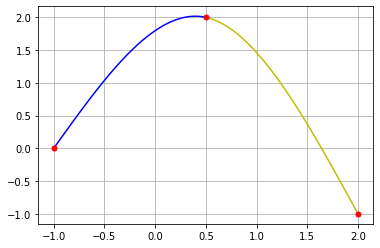

In [20]:
T1 = np.linspace(-1,0.5,100)
T2 = np.linspace(0.5,2,100)
Y1 = c[0]*(T1 - t[0])**3 + c[1]*(T1 - t[0])**2 + c[2]*(T1 - t[0]) + y[0]
Y2 = c[3]*(T2 - t[1])**3 + c[4]*(T2 - t[1])**2 + c[5]*(T2 - t[1]) + y[1]
plt.plot(T1,Y1,'b-',T2,Y2,'y-',t,y,'r.',markersize=10)
plt.grid(True)
plt.show()

In [13]:
np.linalg.cond(A)

15.034681302861333

Now let's use [`scipy.interpolate.CubicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) to compute the natural cubic spline and compare our results.

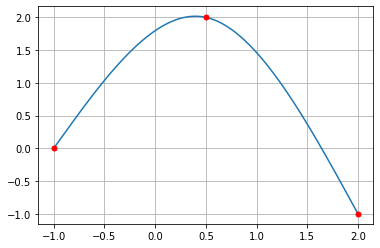

In [23]:
t1 = [-1,0.5,2]
y1 = [0,2,-1]
cs1 = CubicSpline(t1,y1,bc_type='natural')
T1 = np.linspace(-1,2,200)
Y1 = cs1(T1)
plt.plot(T1,Y1,t1,y1,'r.',markersize=10)
plt.grid(True)
plt.show()

Verify the coefficient matrix:

In [24]:
cs1.c

array([[-0.37037037,  0.37037037],
       [ 0.        , -1.66666667],
       [ 2.16666667, -0.33333333],
       [ 0.        ,  2.        ]])

### Example 2

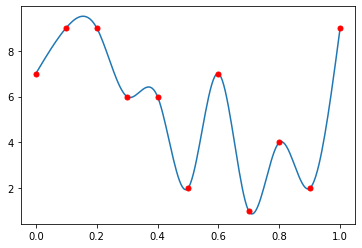

In [26]:
N = 10
t2 = np.linspace(0,1,N+1)
y2 = np.random.randint(0,10,N+1)
cs2 = CubicSpline(t2,y2,bc_type='natural')
T2 = np.linspace(0,1,200)
Y2 = cs2(T2)
plt.plot(T2,Y2,t2,y2,'r.',markersize=10)
plt.show()

### Example 3

Let's interpolate the points $\sin(\pi t_k)$ for $t_k = k/N$ for $N=15$ with added noise.

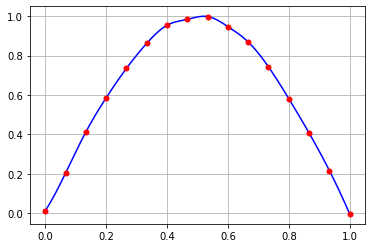

In [27]:
N = 15
t3 = np.linspace(0,1,N+1)
noise = 0.005*np.random.randn(t3.size)
y3 = np.sin(np.pi*t3) + noise
cs3 = CubicSpline(t3,y3)
T3 = np.linspace(0,1,200)
Y3 = cs3(T3)
plt.plot(T3,Y3,'b-',t3,y3,'r.',markersize=10)
plt.grid(True)
plt.show()

The cubic spline is not sensitive to small changes in the $y$ values.